<a href="https://colab.research.google.com/github/ZacharyFry1/Capstone_Project_UFOs/blob/main/Captstone_Zack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap
import plotly.graph_objects as go

In [ ]:
!pip install folium
!pip install geopandas

Data set for our UFO data from NUFORC.

In [ ]:
NM_UFO_DF_ORIGINAL = pd.read_csv('https://raw.githubusercontent.com/ZacharyFry1/Capstone_Project_UFOs/main/NM_UFO_DATA_ALL_LAT_LON_ADDED.csv',  on_bad_lines='skip', encoding='latin-1')

Data set from Enigma.

In [ ]:
ENIGMA_UFO_ORIGINAL = pd.read_csv('https://github.com/ZacharyFry1/Capstone_Project_UFOs/raw/main/Enigma_NM_Data_Cleaned.csv', encoding='latin-1')

In [ ]:
ENIGMA_UFO_ORIGINAL

,Shape,1940-1950 (Count),1950-1960 (Count),1960-1970 (Count),1970-1980 (Count),1980-1990 (Count),1990-2000 (Count),2000- Present (Count),Count By Shape
0,Cone,2.0,1.0,0.0,0.0,1.0,1.0,14.0,19.0
1,Changing,1.0,1.0,0.0,2.0,2.0,7.0,87.0,100.0
2,Chevron,1.0,0.0,0.0,1.0,1.0,1.0,12.0,16.0
3,Cigar,3.0,2.0,3.0,3.0,6.0,6.0,49.0,72.0
4,Circle,71.0,66.0,21.0,22.0,9.0,24.0,246.0,459.0
...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NM_UFO_DF_ORIGINAL.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude
0,Open,9/19/2016 18:22,Cloverdale,NM,USA,Disk,Two saucer shaped clear images at 31 26 14N 10...,9/19/2016,NaN,NaN,31.415807,-108.915531
1,Open,3/19/1991 2:00,"Chihuahua Mts (north of, mexican border)",NM,USA,Light,I was conducting survielance for the military ...,10/30/1998,NaN,NaN,31.427695,-108.791149
2,Open,11/26/2023 14:30,Columbus,NM,USA,Oval,Blimp or hot air balloon like object just belo...,11/27/2023,NaN,NaN,31.827448,-107.638108
3,Open,12/2/2013 20:06,Columbus,NM,USA,Other,Nine small balls of light with tails in arrow ...,12/2/2013,NaN,NaN,31.827448,-107.638108
4,Open,6/17/2016 21:10,Rodeo,NM,USA,Light,"Extremely bright, continuoulsy luminous, objec...",6/18/2016,NaN,NaN,31.835878,-109.030477


## Cleaning

In [ ]:
NM_UFO_DF_CLEAN = NM_UFO_DF_ORIGINAL.copy()

In [ ]:
NM_UFO_DF_CLEAN = NM_UFO_DF_ORIGINAL.drop(['Link', 'Media', 'Explanation'], axis = 1)

In [ ]:
NM_UFO_DF_CLEAN.dropna(subset=['Latitude'], inplace=True)
NM_UFO_DF_CLEAN.shape

(1703, 9)

In [ ]:
NM_UFO_DF_CLEAN['Longitude'].isnull().sum()

0

In [ ]:
ENIGMA_UFO_ORIGINAL = ENIGMA_UFO_ORIGINAL.dropna()

In [ ]:
ENIGMA_UFO_ORIGINAL.drop(23, axis = 0, inplace = True)

<ipython-input-12-c65a7c78ef60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ENIGMA_UFO_ORIGINAL.drop(23, axis = 0, inplace = True)


## Exploratory Data Analysis

### Map of Sightings

In [ ]:
NM_UFO_DF_CLEAN['Latitude'] = pd.to_numeric(NM_UFO_DF_CLEAN['Latitude'], errors='coerce')

In [ ]:
NM_UFO_DF_CLEAN['Latitude'].dtype

dtype('float64')

In [ ]:
fig = px.scatter_mapbox(NM_UFO_DF_CLEAN, lat="Latitude", lon="Longitude")
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(visible=False, resolution=50, scope="usa",
                    showcountries=True, countrycolor="Black",
                    showsubunits=True, subunitcolor="Red")
fig.update_layout(
    geo_scope='usa',  # Limit map scope to USA
    mapbox=dict(
        style="open-street-map",  # Your preferred map style
        center=dict(lat=34.5199, lon=-105.8701),  # Center on New Mexico
        zoom=5  # Adjust zoom level as needed
    )
)
fig.show()

### Heat Map of Sightings

In [ ]:
NM_UFO_gdf = gpd.GeoDataFrame(NM_UFO_DF_CLEAN,
                             geometry=gpd.points_from_xy(NM_UFO_DF_CLEAN.Longitude,
                                                        NM_UFO_DF_CLEAN.Latitude))

In [ ]:
# Create a base map centered on New Mexico
m = folium.Map(location=[34.5199, -105.8701], zoom_start=6)  # Centered on NM

# Drop rows with NaN values in 'Latitude' or 'Longitude' before creating the heatmap
NM_UFO_gdf_clean = NM_UFO_gdf.dropna(subset=['Latitude', 'Longitude'])

# Create the heatmap layer using the cleaned data
HeatMap(data=NM_UFO_gdf_clean[['Latitude', 'Longitude']].values,
        radius=10, blur=15).add_to(m)

# Display the map
m

### Bubble Map

### Animation

In [ ]:
NM_UFO_DF_CLEAN['Occurred'] = pd.to_datetime(NM_UFO_DF_CLEAN['Occurred'])

In [ ]:
NM_UFO_DF_CLEAN['Year'] = NM_UFO_DF_CLEAN['Occurred'].dt.year

In [ ]:
NM_UFO_DF_CLEAN = NM_UFO_DF_CLEAN.sort_values(by=['Occurred'])  # Sort by 'Occurred'


fig = px.scatter_mapbox(
    NM_UFO_DF_CLEAN,
    lat="Latitude",
    lon="Longitude",
    animation_frame="Year",  # Animate by year
    hover_name="Occurred",  # Show 'Occurred' on hover
    color_discrete_sequence=["red"],  # Set marker color
    zoom=6,
    mapbox_style="open-street-map"  # Or any other style you prefer
)

fig.update_layout(
    title="UFO Sightings in New Mexico Over Time",
    mapbox_style="open-street-map",  # Specify mapbox_style here
    mapbox=dict(
        center=dict(lat=34.5199, lon=-105.8701),  # Center on New Mexico
        zoom=5.25  # Adjust zoom to focus on New Mexico
    )
)

fig.show()

In [ ]:
fig.write_html(file="map.html")

### NUFORC Shape Data

25 different shapes.

In [ ]:
NM_UFO_DF_CLEAN[['Shape']].nunique()

,0
Shape,25


In [ ]:
shape_data = NM_UFO_DF_CLEAN[['Shape']]

In [ ]:
shape_data.isnull().sum()

,0
Shape,70


In [ ]:
shape_data = shape_data.dropna()

In [ ]:
shape_data.isnull().sum()

,0
Shape,0


NUFORC shape data.

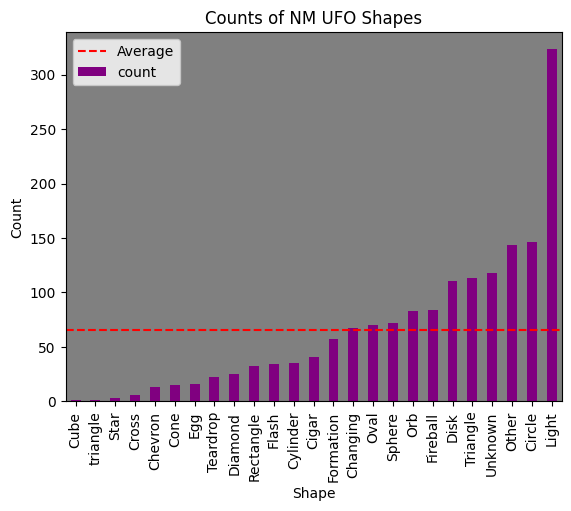

In [ ]:
shape_counts = shape_data['Shape'].value_counts()
shape_counts = shape_counts.sort_values(ascending = True)
shape_counts.plot(kind='bar', color = 'purple')
average_count = shape_counts.mean()
plt.axhline(y=average_count, color='red', linestyle='--', label='Average')
plt.xlabel("Shape")
plt.ylabel("Count")
plt.title("Counts of NM UFO Shapes")
plt.legend()
plt.gca().set_facecolor('gray')
plt.show()

Light is by far the most common shape. Circle and other are next.

### Enigma Shape Data

In [ ]:
ENIGMA_UFO_ORIGINAL

,Shape,1940-1950 (Count),1950-1960 (Count),1960-1970 (Count),1970-1980 (Count),1980-1990 (Count),1990-2000 (Count),2000- Present (Count),Count By Shape
0,Cone,2.0,1.0,0.0,0.0,1.0,1.0,14.0,19.0
1,Changing,1.0,1.0,0.0,2.0,2.0,7.0,87.0,100.0
2,Chevron,1.0,0.0,0.0,1.0,1.0,1.0,12.0,16.0
3,Cigar,3.0,2.0,3.0,3.0,6.0,6.0,49.0,72.0
4,Circle,71.0,66.0,21.0,22.0,9.0,24.0,246.0,459.0
5,Cross,0.0,0.0,0.0,0.0,1.0,1.0,5.0,7.0
6,Cube,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,Cylinder,2.0,4.0,2.0,0.0,3.0,3.0,37.0,51.0
8,Diamond,2.0,0.0,1.0,1.0,2.0,34.0,32.0,72.0
9,Disk,48.0,34.0,22.0,16.0,7.0,1.0,121.0,249.0


In [ ]:
ENIGMA_UFO_ORIGINAL = ENIGMA_UFO_ORIGINAL.sort_values(by=['Count By Shape'])
average_count = ENIGMA_UFO_ORIGINAL['Count By Shape'].mean()

Enigma Shape Data

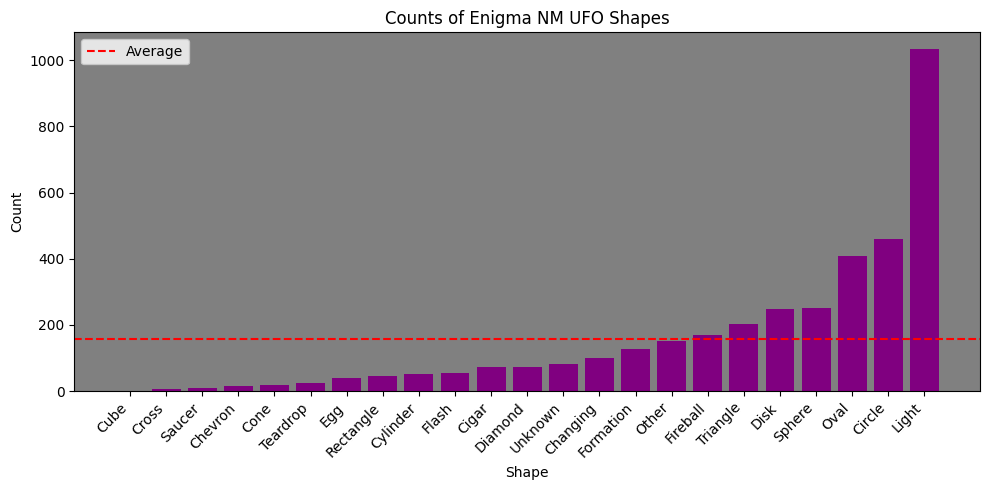

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.bar(ENIGMA_UFO_ORIGINAL['Shape'], ENIGMA_UFO_ORIGINAL['Count By Shape'], color='purple')
plt.axhline(y=average_count, color='red', linestyle='--', label='Average')
plt.xlabel("Shape")
plt.ylabel("Count")
plt.title("Counts of Enigma NM UFO Shapes")
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('gray')
plt.tight_layout()
plt.legend()
plt.show()